## Problem 1 : Predicting CentralAir using SalePrice 
Import the complete dataset “train.csv” in Jupyter, as  houseData = pd.read_csv('train.csv')   
Note : In this exercise, we will not extract the variables from the dataset, as we did the last time.   
 
    a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. Note   
    that the classes Y and N are quite unbalanced; do you think this will create any problem in our Classification?   
    
    b) Plot houseData['CentralAir'] vs houseData['SalePrice'] using boxplot, and note the strong relationship.   
    Also check the mutual relationship by plotting the two variables using a swarmplot, and note the difference.   
    
    c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier   
    
    d) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows).   
    
    e) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables.    
    
    y_train = pd.DataFrame(houseData_train['CentralAir'])    
    X_train = pd.DataFrame(houseData_train['SalePrice'])   
    
    f) Visualize the Decision Tree model using graphviz (needs the packages to be installed; check if they are installed).   
    
    g) Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.   
    Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.   
    
    h) Print all the accuracy parameters of the decision tree model, including its Classification Accuracy, True Positive   
    Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the aforesaid confusion matrix.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')

### a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. Note 
###    that the classes Y and N are quite unbalanced; do you think this will create any problem in our Classification? 

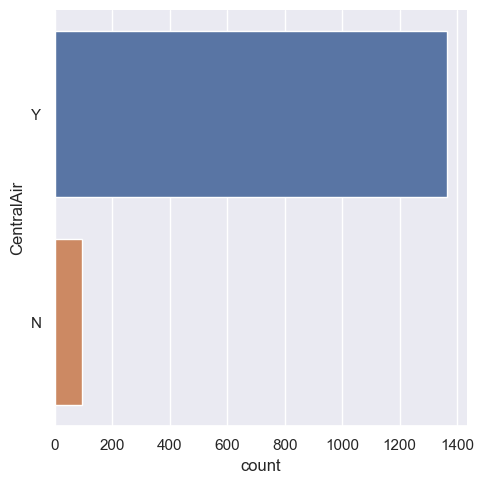

In [9]:
sb.catplot(data = houseData, y = 'CentralAir', kind = 'count')

Due to the unbalanced number of Y and N, depending on the samples taken, results might not include any N values

### b) Plot houseData['CentralAir'] vs houseData['SalePrice'] using boxplot, and note the strong relationship. 
###    Also check the mutual relationship by plotting the two variables using a swarmplot, and note the difference. 

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

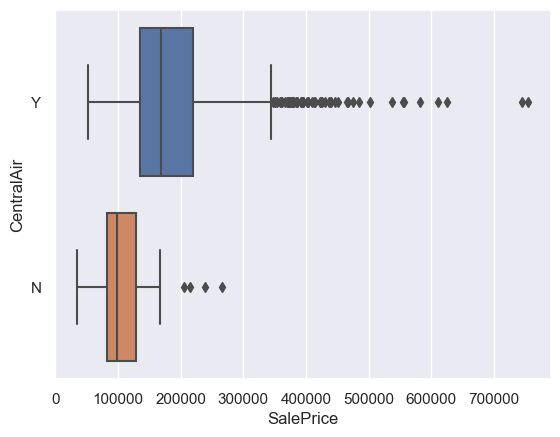

In [11]:
sb.boxplot(data = houseData, y = 'CentralAir', x = 'SalePrice')

c:\Users\Magiccofee\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

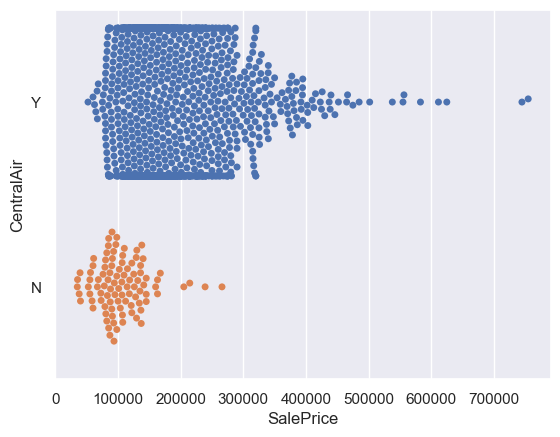

In [21]:
sb.swarmplot(data = houseData, y = 'CentralAir', x = 'SalePrice', orient = "h")

### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier 

In [16]:
from sklearn.tree import DecisionTreeClassifier

### d) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows). 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = houseData['CentralAir']
X = houseData[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360/1460, random_state = 42)

### e) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables.  
y_train = pd.DataFrame(houseData_train['CentralAir'])  
X_train = pd.DataFrame(houseData_train['SalePrice']) 

In [29]:
DecTree = DecisionTreeClassifier() 
DecTree.fit(X_train,y_train)

DecisionTreeClassifier()

### f) Visualize the Decision Tree model using graphviz (needs the packages to be installed; check if they are installed). 

In [27]:
from sklearn.tree import plot_tree

[Text(0.4903125, 0.9736842105263158, 'X[0] <= 107750.0\ngini = 0.132\nsamples = 1100\nvalue = [78, 1022]'),
 Text(0.180625, 0.9210526315789473, 'X[0] <= 76250.0\ngini = 0.479\nsamples = 113\nvalue = [45, 68]'),
 Text(0.06166666666666667, 0.868421052631579, 'X[0] <= 45650.0\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.04833333333333333, 0.8157894736842105, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.075, 0.8157894736842105, 'X[0] <= 52250.0\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.06166666666666667, 0.7631578947368421, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08833333333333333, 0.7631578947368421, 'X[0] <= 59250.0\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.075, 0.7105263157894737, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.10166666666666667, 0.7105263157894737, 'X[0] <= 67441.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.08833333333333333, 0.6578947368421053, 'X[0] <= 61691.5\ngini = 0.5\nsamples = 4\nvalue = [2, 

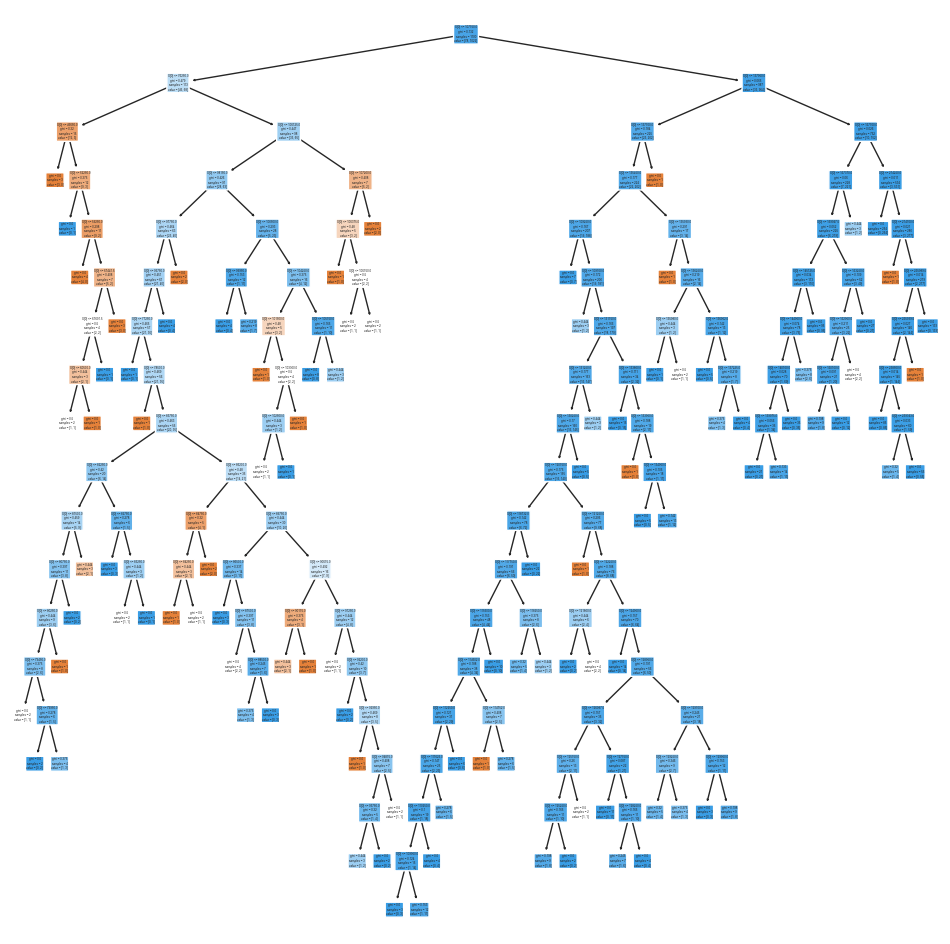

In [30]:
f = plt.figure(figsize=(12,12))
plot_tree(DecTree, filled=True, rounded=True)

### g) Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix. 
###    Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix. 

In [63]:
CentralAir_pred_test = DecTree.predict(X_train)

<AxesSubplot:>

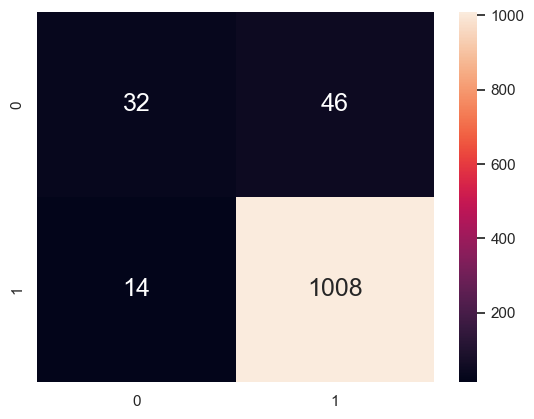

In [64]:
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, CentralAir_pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [65]:
CentralAir_pred_test = DecTree.predict(X_test)

<AxesSubplot:>

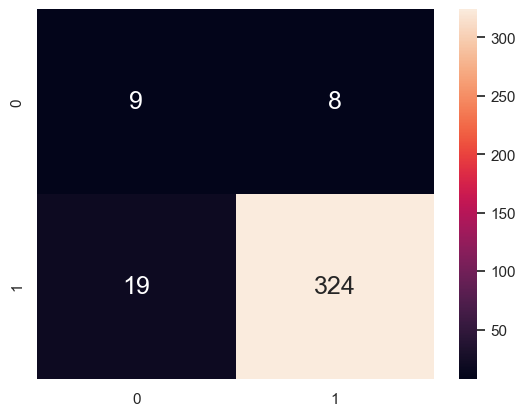

In [66]:
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, CentralAir_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### h) Print all the accuracy parameters of the decision tree model, including its Classification Accuracy, True Positive 
###    Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the aforesaid confusion matrix.

In [67]:
# Print the Classification Accuracy
print("Train Classification Accuracy \t:", DecTree.score(X_train, y_train))
print("Test Classification Accuracy \t:", DecTree.score(X_test, y_test))

Train Classification Accuracy 	: 0.9454545454545454
Test Classification Accuracy 	: 0.925


In [68]:
CM = confusion_matrix(y_test, CentralAir_pred_test)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


In [70]:
print('True Positive Rate', TP/(TP+FN))
print('True Negative Rate', TN/(TN+FP))
print('False Positive Rate', FP/(TP+FP))
print('False Negative Rate', FN/(TN+FN))

True Positive Rate 0.9620991253644315
True Negative Rate 0.17647058823529413
False Positive Rate 0.040697674418604654
False Negative Rate 0.8125


## Problem 2 : Predicting CentralAir using Other Variables 
Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'  
one-by-one to obtain individual Decision Trees. Discuss with your Friends about the models, compare the Classification  
Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'.  

In [53]:
name = ['GrLivArea', 'LotArea', 'TotalBsmtSF']

GrLivArea


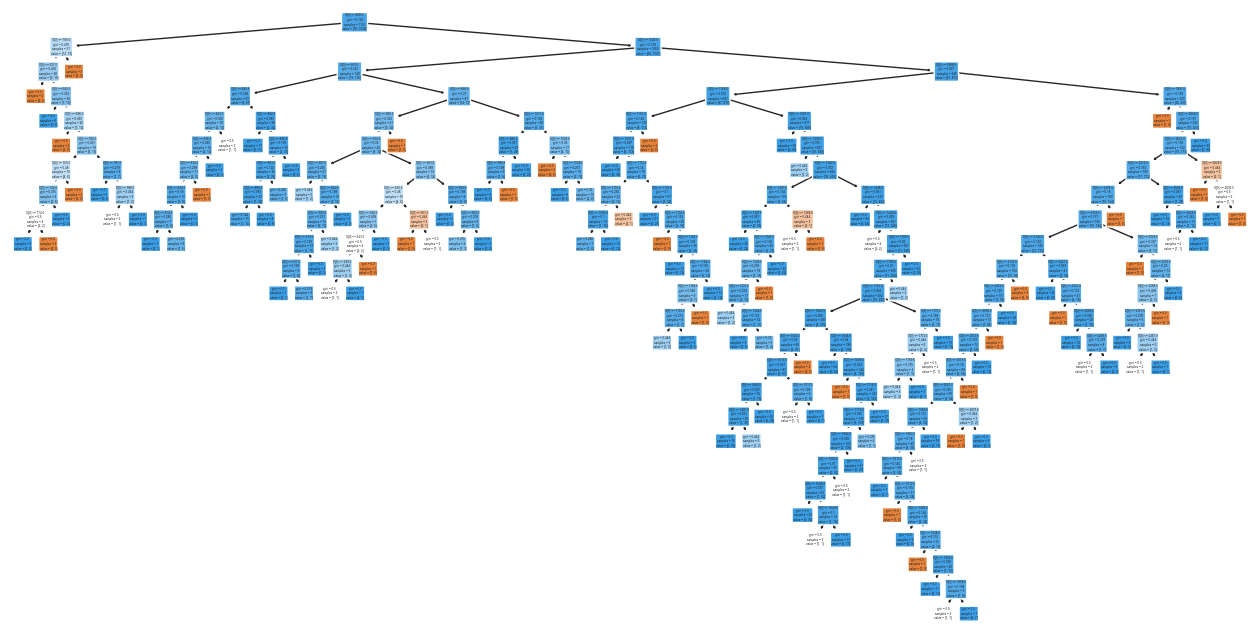

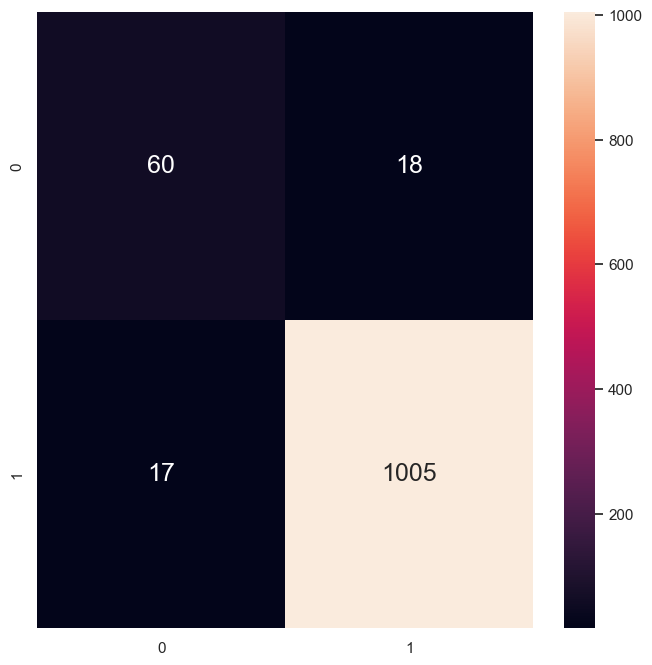

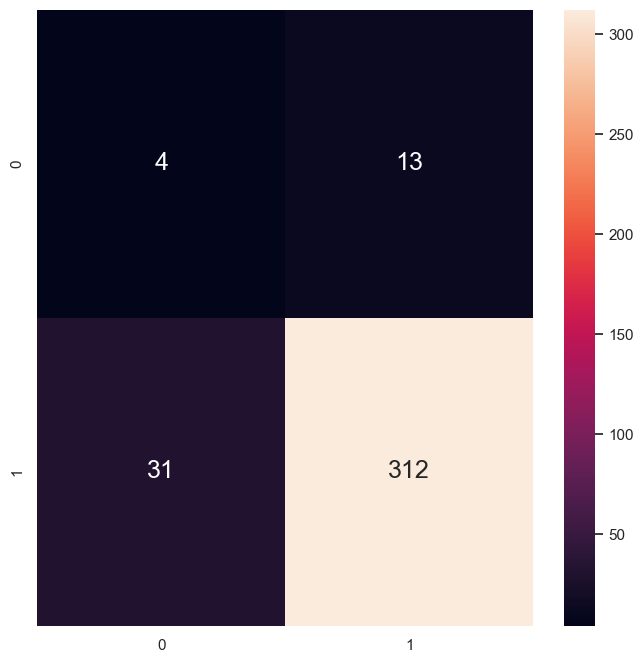

Train Classification Accuracy 	: 0.9681818181818181
Test Classification Accuracy 	: 0.8777777777777778
True Positive Rate 0.9096209912536443
True Negative Rate 0.23529411764705882
False Positive Rate 0.04
False Negative Rate 0.8857142857142857


LotArea


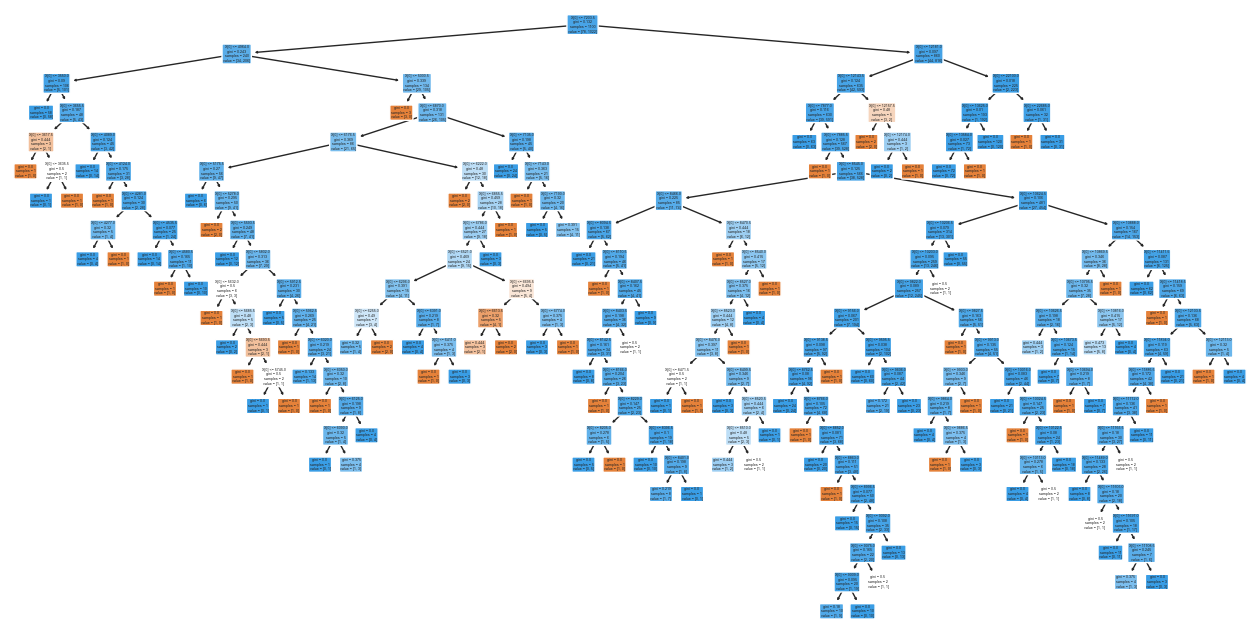

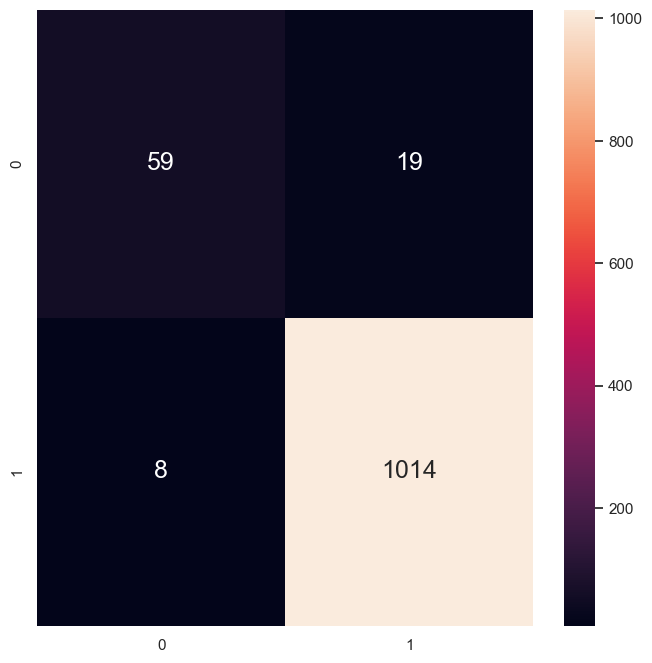

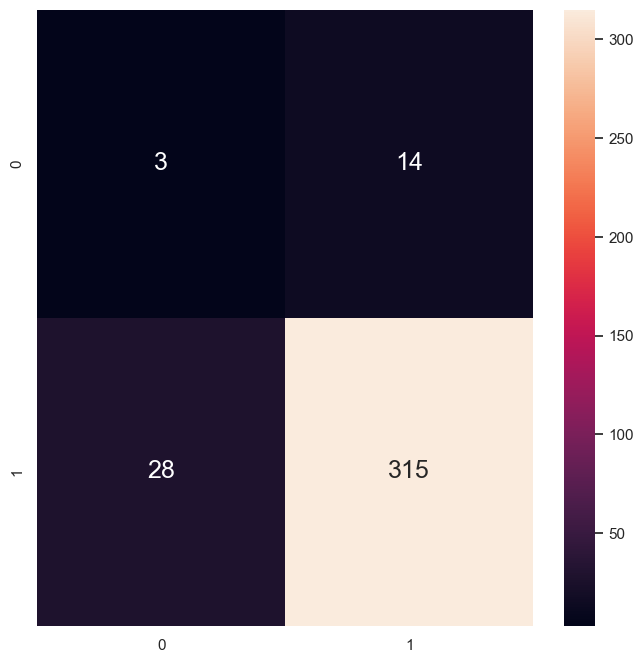

Train Classification Accuracy 	: 0.9754545454545455
Test Classification Accuracy 	: 0.8833333333333333
True Positive Rate 0.9183673469387755
True Negative Rate 0.17647058823529413
False Positive Rate 0.0425531914893617
False Negative Rate 0.9032258064516129


TotalBsmtSF


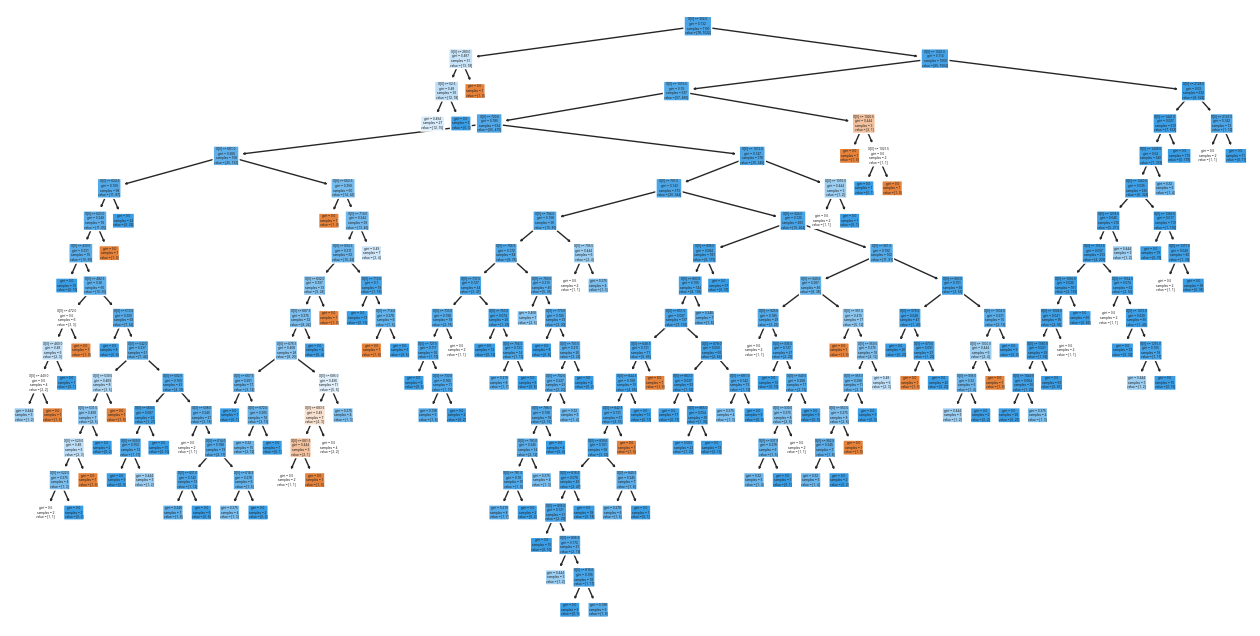

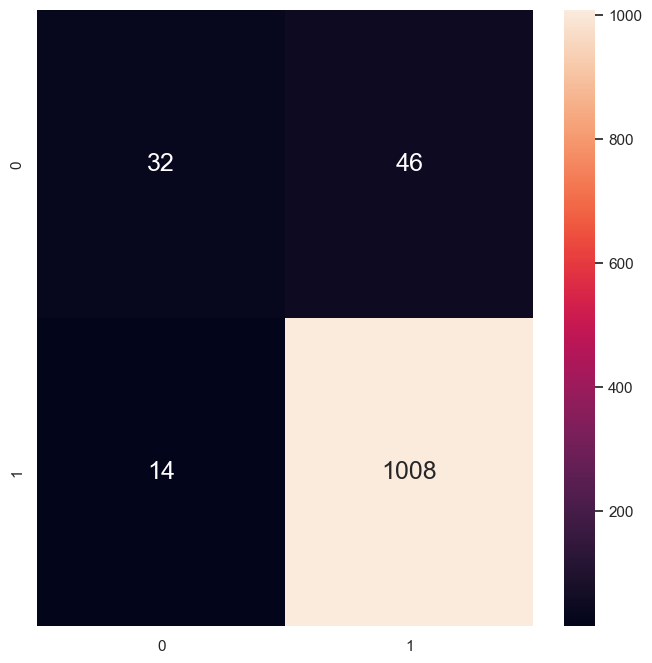

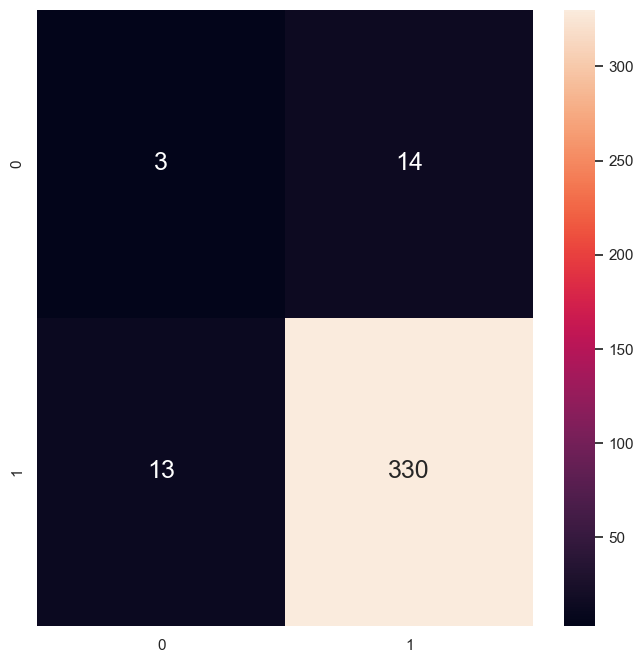

Train Classification Accuracy 	: 0.9454545454545454
Test Classification Accuracy 	: 0.925
True Positive Rate 0.9620991253644315
True Negative Rate 0.17647058823529413
False Positive Rate 0.040697674418604654
False Negative Rate 0.8125




In [71]:
for i in range(len(name)):
    print(name[i])
    y = houseData['CentralAir']
    X = houseData[[name[i]]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360/1460, random_state = 42)
    DecTree = DecisionTreeClassifier() 
    DecTree.fit(X_train,y_train)
    f1 = plt.figure(figsize=(16, 8))
    plot_tree(DecTree, filled=True, rounded=True)
    plt.show()
    CentralAir_pred_train = DecTree.predict(X_train)
    f2 = plt.figure(figsize=(8, 8))
    sb.heatmap(confusion_matrix(y_train, CentralAir_pred_train), annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.show()
    CentralAir_pred_test = DecTree.predict(X_test)
    f3 = plt.figure(figsize=(8, 8))
    sb.heatmap(confusion_matrix(y_test, CentralAir_pred_test), annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.show()
    print("Train Classification Accuracy \t:", DecTree.score(X_train, y_train))
    print("Test Classification Accuracy \t:", DecTree.score(X_test, y_test))
    CM = confusion_matrix(y_test, CentralAir_pred_test)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    print('True Positive Rate', TP/(TP+FN))
    print('True Negative Rate', TN/(TN+FP))
    print('False Positive Rate', FP/(TP+FP))
    print('False Negative Rate', FN/(TN+FN))
    
    print('\n')


TotalBsmtSF is the model that best predicts the CentralAir